In [80]:
import pandas as pd
import numpy as np
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('apple_sales.csv', index_col=False)
store_df = pd.read_csv('apple-store.csv', index_col=False)
product_df = pd.read_csv('apple-product.csv', index_col=False)

In [102]:
df

store_id  prod_id pub_date  units_sold
0        1001       14  2023-01        1000
1        1002       14  2023-01         800
2        1003       14  2023-01        1100
3        1001       14  2023-02         800
4        1002       14  2023-02         759
..        ...      ...      ...         ...
156      1003       12  2022-10           0
157      1003       12  2022-11           0
158      1003       12  2022-12           0
159      1003       12  2023-01           0
160      1003       12  2023-02           0

[161 rows x 4 columns]

In [82]:
print(f'Unique Apple products: {product_df["productid"].unique()}')

Unique Apple products: [14 13 12]


In [83]:
print(f'Unique Apple stores: {store_df["storeid"].unique()}')

Unique Apple stores: [1001 1002 1003]


In [84]:
## Clean Dates
for dates in df['pub_date']:
    cleaned_date = dates.split()
    cleaned_date = cleaned_date[0][:-3]
    df['pub_date']=df['pub_date'].replace(dates, cleaned_date)

### Plots

#### Store Sales Function

In [110]:
#Function to get a sotre's iphone revenue
def store_sales(store_id):
    sns.set_style("darkgrid")

    df_12 = (df[(df['store_id'] == store_id)&(df['prod_id'] == 12)])

    df_13 = (df[(df['store_id'] == store_id)&(df['prod_id'] == 13)])

    df_14 = (df[(df['store_id'] == store_id)&(df['prod_id'] == 14)])


    plt.plot(df_13['pub_date'], df_13['units_sold'], marker = 'x')

    plt.plot(df_12['pub_date'], df_12['units_sold'], marker = 'o')

    plt.plot(df_14['pub_date'], df_14['units_sold'], marker = 'o')

    plt.ylabel('Units Sold')
    plt.xlabel('Dates')
    plt.xticks(rotation = 45)

    plt.title(f'{store_df[store_df["storeid"] == store_id].store_name.item()} Sales')
    plt.legend(['iPhone13', 'iPhone12', 'iPhone14'])
    plt.show()

#### View Store Sales

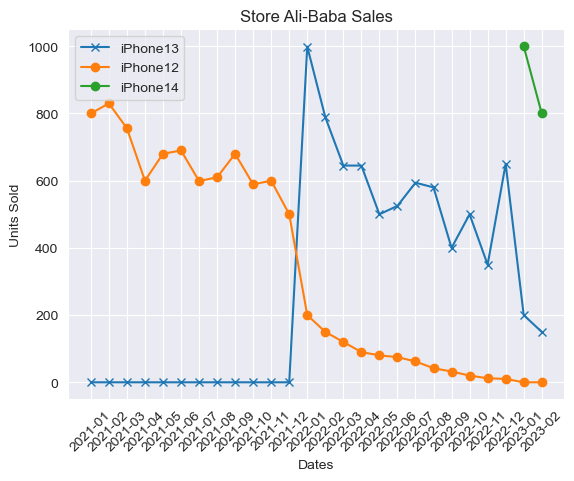

In [111]:
store_sales(1001)

We can see that Store 1 had the most Sales on the 12th of 2021 with 1200 units of iphone 13 sold as well as iphone 14

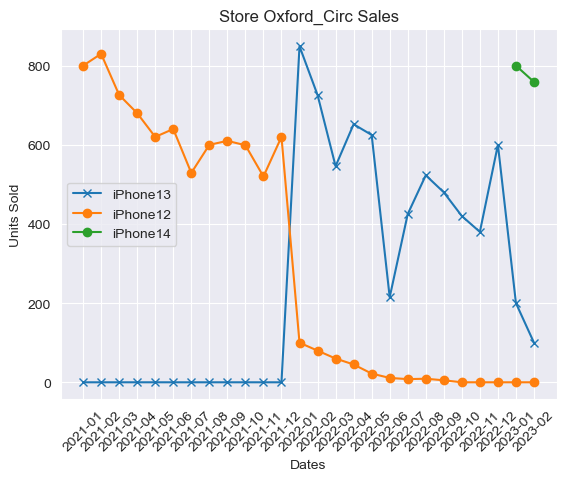

In [112]:
store_sales(1002)

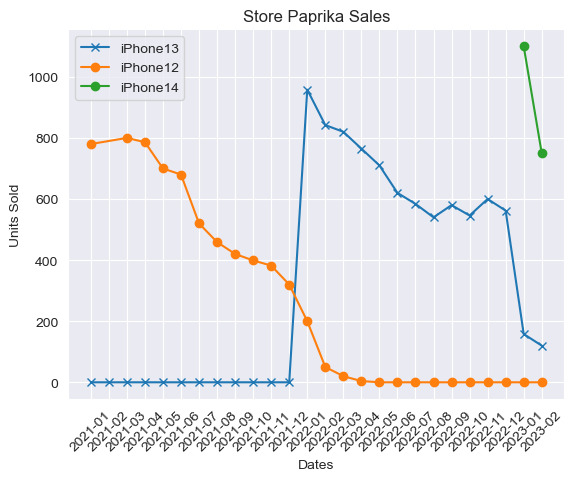

In [113]:
store_sales(1003)

We can see that Store 3 had the most Sales on the 12th of 2021 and lowest sales on the 1st 2023. We can assume that the highest sales is due to Christmas and the lowest sales is when the new iPhone 14 came out.

#### All Store sales

In [114]:
df_date = df.groupby('pub_date').sum()
df_date.reset_index(inplace=True)

In [115]:
df_store_sales= df.groupby(['pub_date', 'store_id']).sum()
df_store_sales.reset_index(inplace=True)

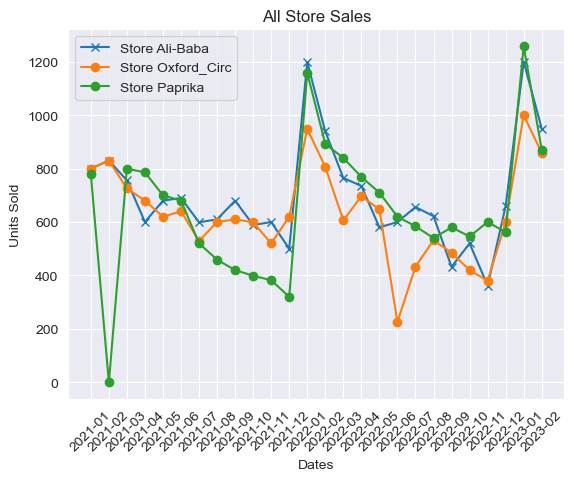

In [119]:
sns.set_style("darkgrid")


plt.plot(df_store_sales[df_store_sales['store_id']==1001].pub_date, df_store_sales[df_store_sales['store_id']==1001].units_sold, marker = 'x')

plt.plot(df_store_sales[df_store_sales['store_id']==1002].pub_date, df_store_sales[df_store_sales['store_id']==1002].units_sold, marker = 'o')

plt.plot(df_store_sales[df_store_sales['store_id']==1003].pub_date, df_store_sales[df_store_sales['store_id']==1003].units_sold, marker = 'o')


plt.ylabel('Units Sold')
plt.xlabel('Dates')

plt.xticks(rotation = 45)

plt.legend(store_df["store_name"].unique())
plt.title('All Store Sales')
plt.show()

We can see that Store 1 had the most Sales on the 12th of 2021 with 1200 units sold.
We can also observe that on thr 1st of 2021 store 3 had 0 units sold.

#### All Apple sales

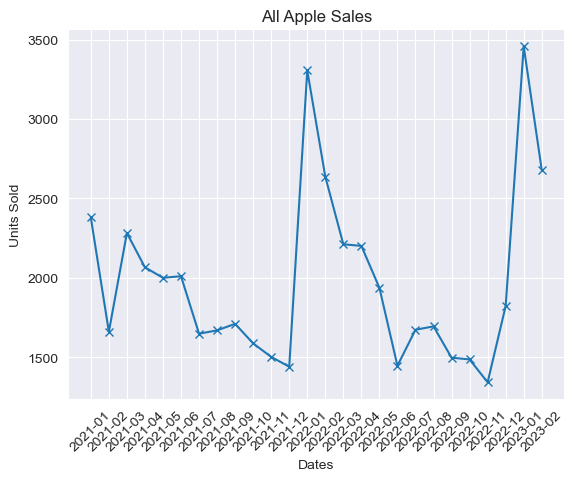

In [12]:
sns.set_style("darkgrid")

plt.plot(df_date['pub_date'], df_date['units_sold'], marker = 'x')

plt.ylabel('Units Sold')
plt.xlabel('Dates')

plt.xticks(rotation = 45)

plt.title('All Apple Sales')
plt.show()

### Calc

#### Sum of units sold per store

In [197]:
def units_sold_per_store(store_id, prod_id):
    store_sum = df[(df['store_id'] == store_id)&(df['prod_id'] == prod_id)]
    if product_df[product_df['productid'] == prod_id].productid.item():
        store_sum = store_sum.groupby('pub_date').sum()*int(product_df[product_df['productid']==prod_id].unit_price.item())
        store_sum.reset_index(inplace=True)
        return store_sum
       

In [198]:
def return_store(store_id, prod_id):
    if isinstance(prod_id, int):
        return units_sold_per_store(store_id, prod_id)
    if isinstance(prod_id, list):
        for items in prod_id:
            store = units_sold_per_store(store_id, items)
            return store

In [346]:
sum_dict={
    '1001' : {'iPhone_14': 0, 'iPhone_13':0, 'iPhone_12':0},
    '1002' : {'iPhone_14': 0, 'iPhone_13':0, 'iPhone_12':0},
    '1003' : {'iPhone_14': 0, 'iPhone_13':0, 'iPhone_12':0},
}

In [349]:
def store_sale_sum(stores, product_id):
    print('Total sum of product per store: \n')
    for i in stores:
        summ = return_store(i,product_id).units_sold.sum()
        sum_dict[f'{i}'][f'{product_df[product_df["productid"] == product_id].product_name.item()}'] = summ
    return sum_dict

In [350]:
store_sale_sum([1001,1002,1003], 14)

Total sum of product per store: 



{'1001': {'iPhone_14': 2698200, 'iPhone_13': 0, 'iPhone_12': 0},
 '1002': {'iPhone_14': 2336941, 'iPhone_13': 0, 'iPhone_12': 0},
 '1003': {'iPhone_14': 2773150, 'iPhone_13': 0, 'iPhone_12': 0}}

In [351]:
store_sale_sum([1001,1002,1003], 13)

Total sum of product per store: 



{'1001': {'iPhone_14': 2698200, 'iPhone_13': 9024873, 'iPhone_12': 0},
 '1002': {'iPhone_14': 2336941, 'iPhone_13': 8082459, 'iPhone_12': 0},
 '1003': {'iPhone_14': 2773150, 'iPhone_13': 10077595, 'iPhone_12': 0}}

In [352]:
store_sale_sum([1001,1002,1003], 12)

Total sum of product per store: 



{'1001': {'iPhone_14': 2698200, 'iPhone_13': 9024873, 'iPhone_12': 8818173},
 '1002': {'iPhone_14': 2336941, 'iPhone_13': 8082459, 'iPhone_12': 8105886},
 '1003': {'iPhone_14': 2773150, 'iPhone_13': 10077595, 'iPhone_12': 6513480}}

#### total_sales

In [353]:
total_sales = pd.DataFrame([[k1, k2, v]
              for k1,d in sum_dict.items() 
              for k2,v in d.items()],
             columns=['store', 'iphone', 'price'])

In [354]:
total_sales

store     iphone     price
0  1001  iPhone_14   2698200
1  1001  iPhone_13   9024873
2  1001  iPhone_12   8818173
3  1002  iPhone_14   2336941
4  1002  iPhone_13   8082459
5  1002  iPhone_12   8105886
6  1003  iPhone_14   2773150
7  1003  iPhone_13  10077595
8  1003  iPhone_12   6513480

In [355]:
max_price = total_sales[total_sales['iphone'] == 'iPhone_14'].price.max()
print(f"Highest iPhone 14 sales £{max_price} in {store_df[store_df['storeid'] ==  int(total_sales[total_sales['price'] == max_price].store.item())].store_name.item()}\n")

print("Total iPhone14 sales in each store: ")
total_sales[total_sales['iphone']== 'iPhone_14']

Highest iPhone 14 sales £2773150 in Store Paprika

Total iPhone14 sales in each store: 


store     iphone    price
0  1001  iPhone_14  2698200
3  1002  iPhone_14  2336941
6  1003  iPhone_14  2773150

In [356]:
max_price = total_sales[total_sales['iphone'] == 'iPhone_13'].price.max()
print(f"Highest iPhone 13 sales £{max_price} in {store_df[store_df['storeid'] ==  int(total_sales[total_sales['price'] == max_price].store.item())].store_name.item()}\n")

print("Total iPhone13 sales in each store: ")
total_sales[total_sales['iphone']== 'iPhone_13']

Highest iPhone 13 sales £10077595 in Store Paprika

Total iPhone13 sales in each store: 


store     iphone     price
1  1001  iPhone_13   9024873
4  1002  iPhone_13   8082459
7  1003  iPhone_13  10077595

In [358]:
max_price = total_sales[total_sales['iphone'] == 'iPhone_12'].price.max()
print(f"Highest iPhone 12 sales £{max_price} in {store_df[store_df['storeid'] ==  int(total_sales[total_sales['price'] == max_price].store.item())].store_name.item()}\n")

print("Total iPhone12 sales in each store: ")
total_sales[total_sales['iphone'] == 'iPhone_12']

Highest iPhone 12 sales £8818173 in Store Ali-Baba

Total iPhone12 sales in each store: 


store     iphone    price
2  1001  iPhone_12  8818173
5  1002  iPhone_12  8105886
8  1003  iPhone_12  6513480